In [1]:
import pandas

data = pandas.read_csv('gbm-data.csv')
print data.shape
data.head()

(3751, 1777)


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.cross_validation import train_test_split

x = data.as_matrix()[:, 1:]
y = data.as_matrix()[:, 0]

X_test, X_train, y_test, y_train = train_test_split(x, y, test_size=0.8, random_state=241)

In [57]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def count_log_loss(clf):
    log_loss_train = []
    log_loss_test = []

    # For each iteration get predicted values matrix (n_estimators = 250)
    for (train, test) in zip(clf.staged_decision_function(X_train), clf.staged_decision_function(X_test)):
        log_loss_train.append(log_loss(y_true=y_train, y_pred=sigmoid(train)))
        log_loss_test.append(log_loss(y_true=y_test, y_pred=sigmoid(test)))
    
    return log_loss_train, log_loss_test


def build_plots(log_loss_train, log_loss_test, learning_rate):
    for (i, lr) in enumerate(learning_rate):    
        t1 = range(250)
        
        plt.figure(i + 1)
        plt.subplot(211)
        plt.plot(t1, log_loss_train[i], 'r')
        plt.title('train, lr = ' + str(lr))
        plt.xlabel('iterations')
        plt.ylabel('log_loss')

        plt.subplot(212)
        plt.plot(t1, log_loss_test[i], 'b')
        plt.title('test')
        plt.xlabel('iterations')
        plt.ylabel('log_loss')
        
    plt.tight_layout()
    return plt

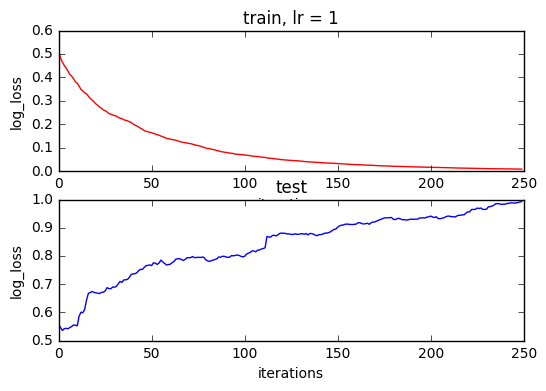

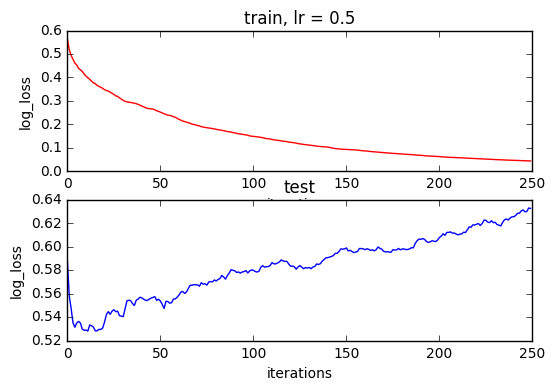

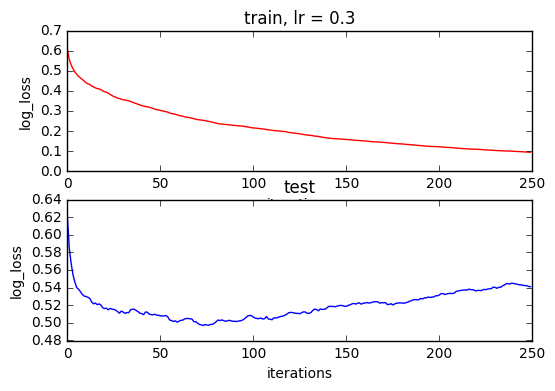

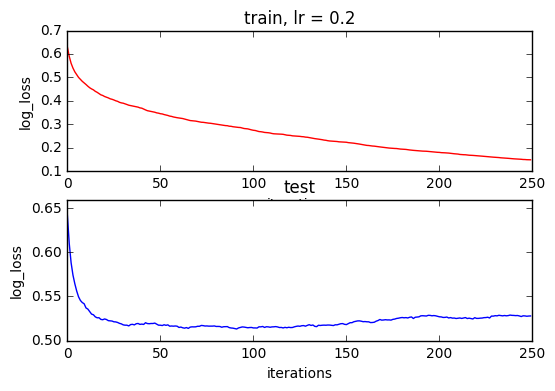

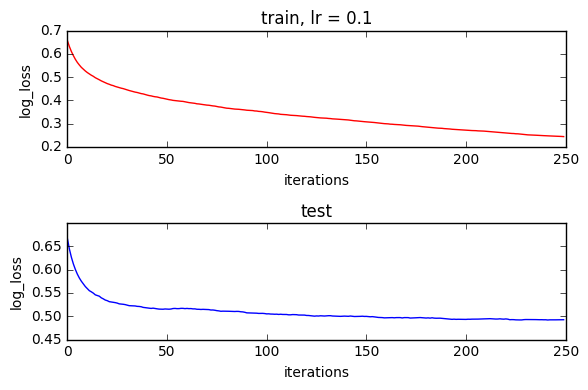

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

# clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241)
# clf.fit(X_train, y_train)

learning_rate = [1, 0.5, 0.3, 0.2, 0.1]
quality_train = []
quality_test = []
for lr in learning_rate:
    clf = GradientBoostingClassifier(n_estimators=250, random_state=241, learning_rate=lr)
    clf.fit(X_train, y_train)
    log_loss_train, log_loss_test = count_log_loss(clf)
    quality_train.append(log_loss_train)
    quality_test.append(log_loss_test)

plt = build_plots(quality_train, quality_test, learning_rate)
plt.show()

In [70]:
quality_train_nd = np.asarray(quality_train)
quality_test_nd = np.asarray(quality_test)

'min log-loss with lr = 2 is:', np.min(quality_test_nd[3]), 'on iteration', np.argmin(quality_test_nd[3])
print len(quality_test_nd[1])

250


In [68]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=241, n_estimators=91)
forest_clf.fit(X_train, y_train)

log_loss(y_true=y_test, y_pred=forest_clf.predict_proba(X_test))

0.47748685478293346